In [0]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2

In [0]:
path = 'mnist'

In [124]:
p = os.listdir(path)
p.sort(key=str.lower)
p.sort(key=str.lower)
train_arr = []
test_arr = []
print(p)


['t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz']


In [0]:
import gzip
file_train = gzip.open(path + '/' + p[2],'r')

image_size = 28
num_images = 60000

import numpy as np
file_train.read(16)
buf = file_train.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

In [0]:
labels = np.empty(60000)
file_train = gzip.open(path + '/' + p[3],'r')
file_train.read(8)
for i in range(0,60000):   
    buf = file_train.read(1)
    r = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    labels[i] = r
    #print(labels)

In [188]:
labels.shape

(60000,)

In [0]:
file_test = gzip.open(path + '/' + p[0],'r')

image_size = 28
num_images = 10000

import numpy as np
file_test.read(16)
buf = file_test.read(image_size * image_size * num_images)
test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test = test.reshape(num_images, image_size, image_size)

In [0]:
test_labels = np.empty(10000)
file_test = gzip.open(path + '/' + p[1],'r')
file_test.read(8)
for i in range(0,10000):   
    buf = file_test.read(1)
    k = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    test_labels[i] = k
    #print(labels)

In [0]:
(x_train, y_train) = (data, labels)
(x_test, y_test) = (test, test_labels)

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))



model.compile(optimizer = 'adam',                         ##
             loss = 'sparse_categorical_crossentropy',    ##
             metrics = ['accuracy'])   

In [210]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2589 - acc: 0.9240
Epoch 2/5
60000/60000 [==============================] - 15s 242us/sample - loss: 0.1069 - acc: 0.9671
Epoch 3/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0737 - acc: 0.9764
Epoch 4/5
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0541 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0415 - acc: 0.9862


dict_keys(['loss', 'acc'])


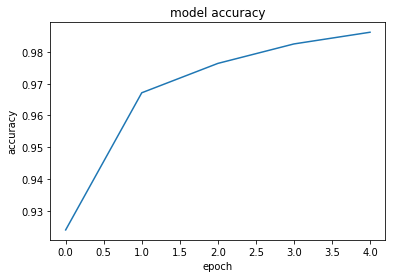

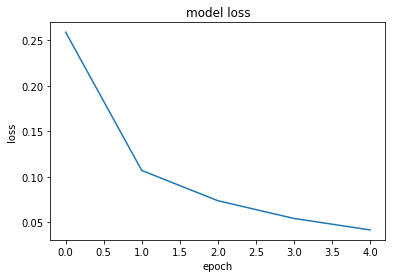

In [211]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [215]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0879 - acc: 0.9758
0.08793791019986384 0.9758


In [216]:
model.save('my_model.model')
new_model = tf.keras.models.load_model('my_model.model')

In [217]:
prediction = new_model.predict(x_test)
print(prediction)

[[1.0402049e-09 2.4914282e-08 5.4933903e-08 ... 9.9999738e-01
  6.8082473e-10 1.8359502e-06]
 [2.8769516e-13 7.2935173e-08 9.9999988e-01 ... 1.1445447e-13
  1.2389463e-09 7.9071855e-15]
 [2.2680910e-09 9.9999428e-01 2.0582878e-07 ... 4.1185353e-06
  4.5936886e-07 1.0321492e-07]
 ...
 [1.9690295e-10 3.6468779e-07 3.6281747e-10 ... 3.7929127e-07
  3.7752330e-09 1.6192726e-05]
 [9.8053610e-10 2.6979134e-09 3.8381742e-09 ... 1.8296825e-09
  3.4446018e-03 1.0749575e-11]
 [3.3160419e-09 1.3350737e-11 4.0850667e-10 ... 7.5024737e-14
  1.3676951e-09 5.1122578e-12]]


7


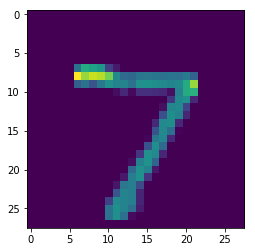

In [219]:
print(np.argmax(prediction[0]))
plt.imshow(x_test[0])
plt.show()